# Heart Stroke Prediction

Summary

- 1. **Objective**

- 2. **Data** 
- 2.1 Data downloading
- 2.2 Variables
- 2.3 Data Info and dropping unrelated varibles
- 2.4 Data Cleaning

- 3. **Data Visualization**

- 4. Preprocessing
- 4.1 Data Encoding
- 4.2 Outliers
- 4.3 Duplicates
- 4.4 Transforming to NumPy
- 4.5 Over Sampling
- 4.6 Standardasing data

- 5. **Model Evaluation**
- 5.1 Logistic Regression
- 5.2 K-Nearest Negbhor
- 5.3 Support Vector Machine
- 5.4 Decision Tree
- 5.5 Naive Bayes
- 5.6 Random Forest

- 6. **Model Comparision**
- 6.1 Confusion Matrix
- 6.2 Model Precision Comparision
- 6.3 ROC Curve

- 7. **Conclusion**

## 1. Objective

Objective of this project is to define heart stroke by using differend Machine Learning Classification based on given data like age, glucose level, BMI and so on.

SVM Classification outperformed the rest classification models in terms of weighted precision by 96%.

Heart stroke detection is not recommended Based on given data - variables and Machine Learning techniques, further variables are required for sufficient accuracy.

Let's do a quick review for heart stroke. A heart attack occurs when blood flow to a part of the heart is blocked, usually by a blood clot. Without oxygenated blood, the heart muscle begins to die. A stroke is a brain attack, cutting off vital blood flow and oxygen to the brain. Stroke happens when a blood vessel feeding the brain gets clogged or bursts. 
 
Although heart attack and stroke are different, the risk factors are the same for both:
- Smoking
- High blood pressure
- High cholesterol
- Diabetes
- Sedentary lifestyle
- Family history
- Atrial fibrillation (abnormal heart rhythm)

## 2. Data

In [ ]:
# Importing Essential libraries:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pltm

from pandas import Series, DataFrame
from matplotlib import rcParams
from matplotlib import pyplot

### 2.1 Data downloading

In [2]:
# Downloading data

df = pd.read_csv('/Users/ruhidmirzayev/Desktop/ ML_Projects/Projects/Heart_Stroke/heart_stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 2.2 Variables

1. id: unique identifier - **Unrelated Data**
2. gender: "Male", "Female" or "Other" 
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown" - ***Note: "Unknown" in smoking_status means that the information is unavailable for this patient**
12. stroke: 1 if the patient had a stroke or 0 if not


### 2.3 Data Info and dropping unrelated variables

In [3]:
print(df.info())

# We have 200 null values which are consisting small part of our data. We can drop them.
df= df.dropna(axis = 0)
print(df.info())

# We can drop ID column, it does not make any sense.
df = df.drop(['id'], axis = 1)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype

All numerical variables look normal from the table if we look through their **Min, Max** values.

In [4]:
print(df['gender'].value_counts())

print('')

print(df['ever_married'].value_counts())

print('')

print(df['work_type'].value_counts())

print('')

print(df['smoking_status'].value_counts())

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Yes    3204
No     1705
Name: ever_married, dtype: int64

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


### 2.4 Data Cleaning

- Gender variable has one observation named 'other' we can drop it.  
- Smoking status has 1483 unknown observations. It is kind of values we can not replace them with 'smokes' or 'never smoked' because it makes our data biased. **According to studies, smoking increases heart strokes twice**. I think that is why I need to drop unkown observations in variable - smoking_status. I can not keep these variables either, because we automatically classify smokers and non smokers as same class.

In [5]:
# Dropping Unknown values from smoking_status
df.drop(df[df['smoking_status'] == 'Unknown'].index , inplace=True)
df.drop(df[df['gender'] == 'Other'].index , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.1+ KB


### 2.5 EDA (Exploratory Data Analysis)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3425.0,48.652555,18.850018,10.00,34.00,50.00,63.0,82.00
hypertension,3425.0,0.119124,0.323982,0.00,0.00,0.00,0.0,1.00
heart_disease,3425.0,0.060146,0.237792,0.00,0.00,0.00,0.0,1.00
avg_glucose_level,3425.0,108.311670,47.706754,55.12,77.23,92.35,116.2,271.74
bmi,3425.0,30.292350,7.295778,11.50,25.30,29.10,34.1,92.00
stroke,3425.0,0.052555,0.223175,0.00,0.00,0.00,0.0,1.00


In [7]:
df[df['stroke'] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3245.0,47.576271,18.579456,10.00,33.00,48.00,62.00,82.00
hypertension,3245.0,0.108166,0.310638,0.00,0.00,0.00,0.00,1.00
heart_disease,3245.0,0.052388,0.222843,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,3245.0,106.733082,46.197133,55.12,77.06,91.88,114.25,267.76
bmi,3245.0,30.272419,7.346804,11.50,25.20,29.00,34.10,92.00
stroke,3245.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


In [8]:
df[df['stroke'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,180.0,68.055556,11.885263,32.00,59.00,71.00,79.00,82.00
hypertension,180.0,0.316667,0.466474,0.00,0.00,0.00,1.00,1.00
heart_disease,180.0,0.200000,0.401116,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,180.0,136.770111,63.230968,56.11,81.57,110.16,197.01,271.74
bmi,180.0,30.651667,6.312526,16.90,26.60,29.75,34.10,56.60
stroke,180.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


**Initial Insights**
- Average age for heart stroke is 68, but non stroke 47. Age is important factor.
- Glucose level in blood for heart stroke is 136 where 30 more than non stroke people.
- BMI does not affect heart stroke.
- People with heart disease are 4 times likely to face heart stroke.
- People with hypertension are 3 times likely to face heart stroke.

## 3. Data Visualisation

0    3245
1     180
Name: stroke, dtype: int64


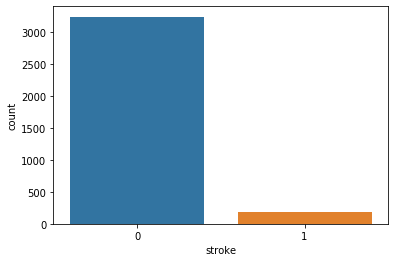

In [9]:
ax = sb.countplot(x='stroke', data=df)
print(df['stroke'].value_counts())

As we see from above charts, non stroke values are more than stroke values co nsiderably. Oversample is problem here. We will deal with it by using **SMOTE.**

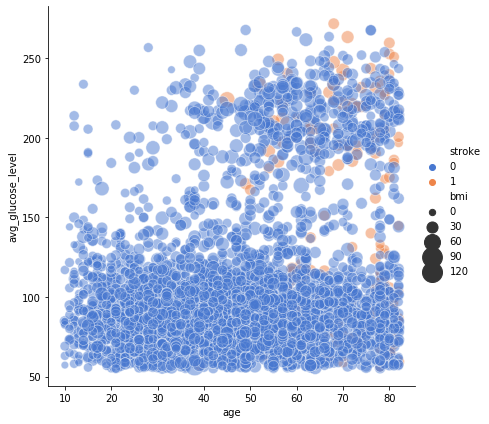

In [10]:
sb.relplot(x="age", y="avg_glucose_level", hue="stroke", size="bmi",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

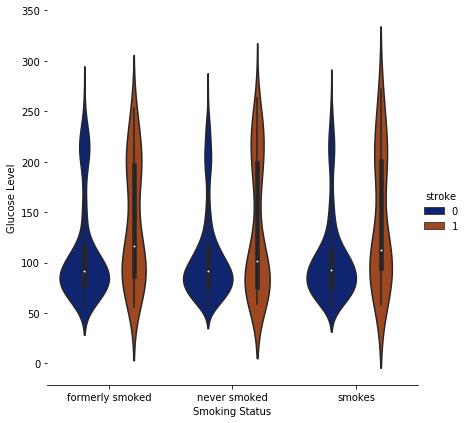

In [11]:
g = sb.catplot(
    data=df, kind="violin",
    x="smoking_status", y="avg_glucose_level", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("Smoking Status", "Glucose Level")

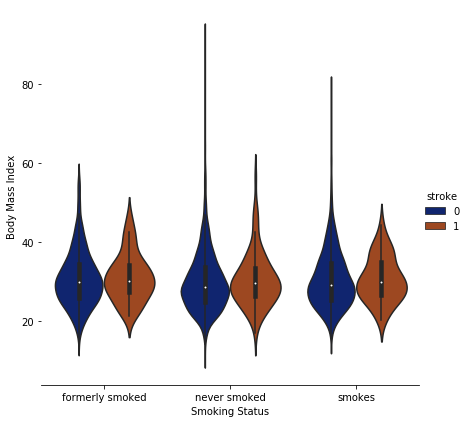

In [12]:
g1 = sb.catplot(
    data=df, kind="violin",
    x="smoking_status", y="bmi", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g1.despine(left=True)
g1.set_axis_labels("Smoking Status", "Body Mass Index")

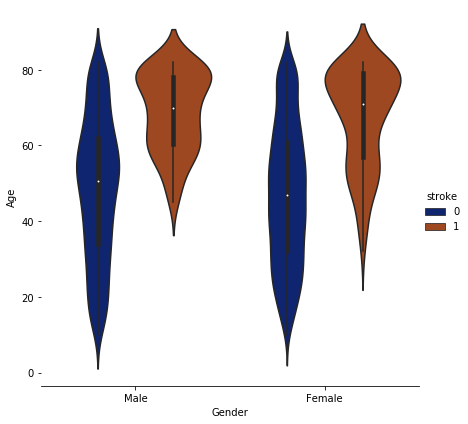

In [13]:
g2 = sb.catplot(
    data=df, kind="violin",
    x="gender", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g2.despine(left=True)
g2.set_axis_labels("Gender", "Age")

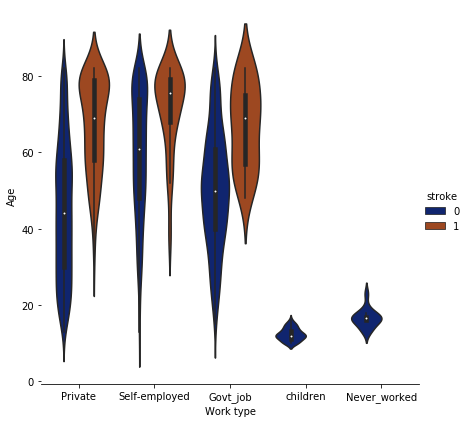

In [14]:
g3 = sb.catplot(
    data=df, kind="violin",
    x="work_type", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g3.despine(left=True)
g3.set_axis_labels("Work type", "Age")

- Accordig to violin plot above, self-employed people are facing heart stroke later than other groups. 

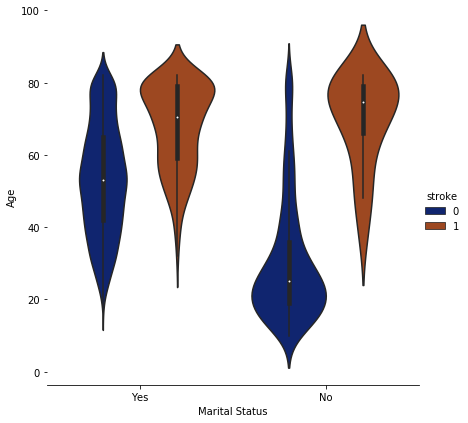

In [15]:
g5 = sb.catplot(
    data=df, kind="violin",
    x="ever_married", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g5.despine(left=True)
g5.set_axis_labels("Marital Status", "Age")

- From above violinplot, we can see that married people are subjected to heart stroke earlier than never married people.

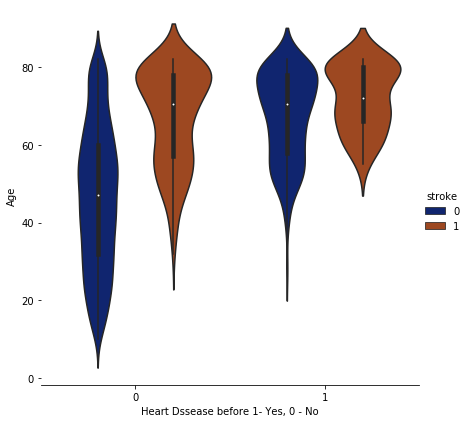

In [16]:
g4 = sb.catplot(
    data=df, kind="violin",
    x="heart_disease", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g4.despine(left=True)
g4.set_axis_labels("Heart Dssease before 1- Yes, 0 - No", "Age")

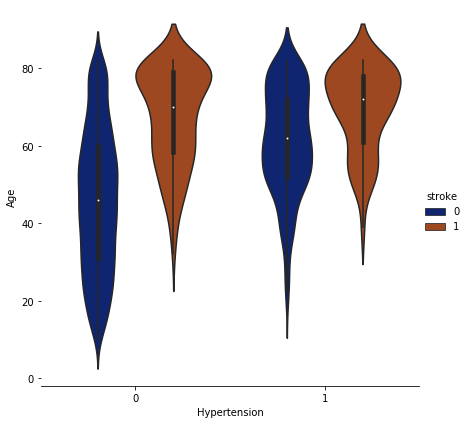

In [17]:
g6 = sb.catplot(
    data=df, kind="violin",
    x="hypertension", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g6.despine(left=True)
g6.set_axis_labels("Hypertension", "Age")

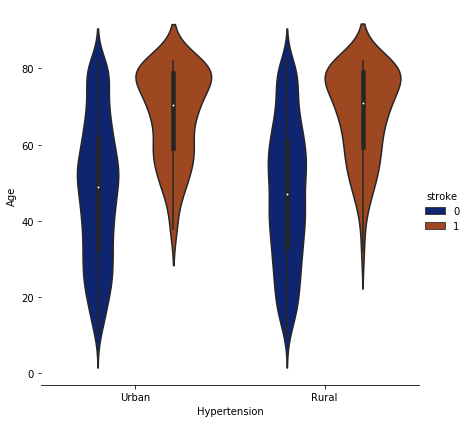

In [18]:
g7 = sb.catplot(
    data=df, kind="violin",
    x="Residence_type", y="age", hue="stroke",
    ci="sd", palette="dark", alpha=.6, height=6)
g7.despine(left=True)
g7.set_axis_labels("Hypertension", "Age")

- It seems, living in rural or urban place does not affect heart stroke.

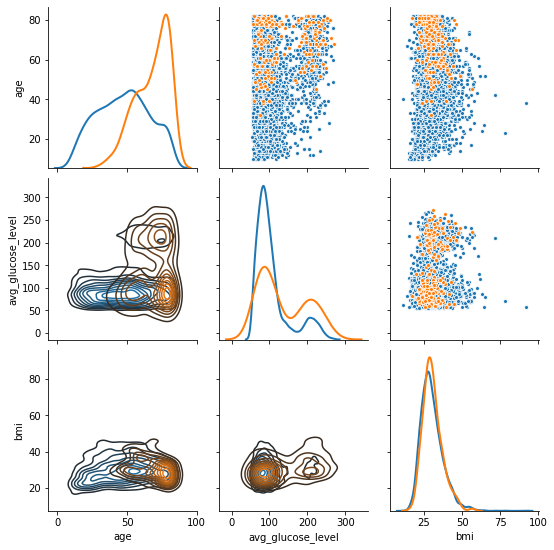

In [19]:
# Paired density and scarplot matrix.

df1 = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
r = sb.PairGrid(df1,hue='stroke', diag_sharey=False)
r.map_upper(sb.scatterplot, s=15)
r.map_lower(sb.kdeplot)
r.map_diag(sb.kdeplot, lw=2)

- 40 years older people, with BMI 25-40 have higher probability to face heart stroke 

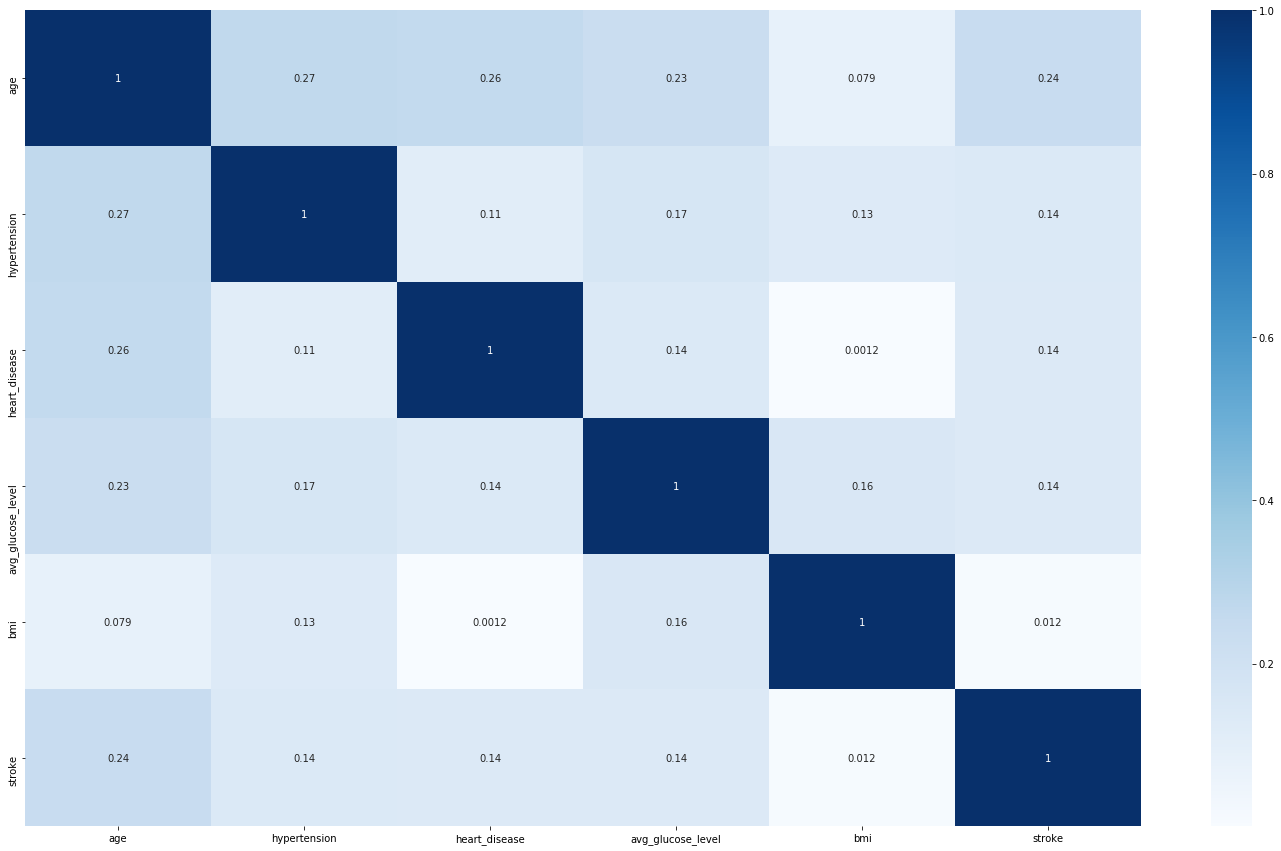

In [20]:
# Let's draw a heatmap with the numeric values in each cell.

corr = df.corr()
pltm.figure(figsize=(25,15))
sb.heatmap(corr, cmap='Blues', annot = True)
pltm.show()

## 4. Preprocessing

### 4.1 Data Encoding

In [21]:
# Let's replace strings with numbers to work with NumPy
df.replace(to_replace = {
    'gender': {'Female':0, 'Male':1},
    'Residence_type':{'Urban':1, 'Rural':0},
    'ever_married': {'No':0, 'Yes':1},
    'work_type': {'Never_worked':0, 'children':1, 'Private':2, 'Self-employed':3, 'Govt_job':4},
    'smoking_status': {'never smoked':0, 'formerly smoked':1, 'smokes':3}}, inplace = True)
    
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,0,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,0,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### 4.2 Outliers

Outliers lie abnormal distance from mean. Sometimes, they are problematic. 

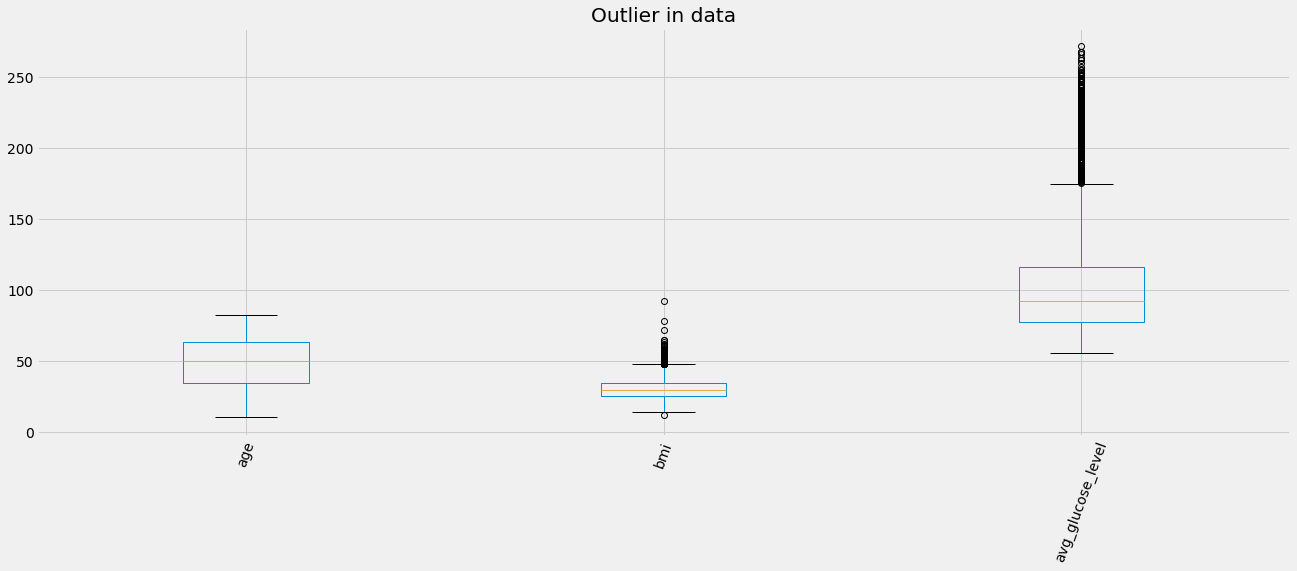

In [22]:
pltm.style.use('fivethirtyeight')
outlier= df[['age', 'bmi', 'avg_glucose_level']].plot(kind='box',figsize=(20,7));
pltm.xticks(rotation=70);
pltm.title('Outlier in data');

In [23]:
# Dealing with outlier

def treat_outlier(x):
    sorted(x)
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    l_r=q1-(1.5*iqr)
    u_r=q3+(1.5*iqr)
    return l_r,u_r  

In [24]:
# Defining variables

float_columns = ['bmi', 'age', 'avg_glucose_level']

In [25]:
# Solving outliers

for i in df[float_columns].columns:
    lr,ur = treat_outlier(df[i])
    df[i] = np.where(df[i]>ur,ur,df[i])
    df[i] = np.where(df[i]<lr,lr,df[i])

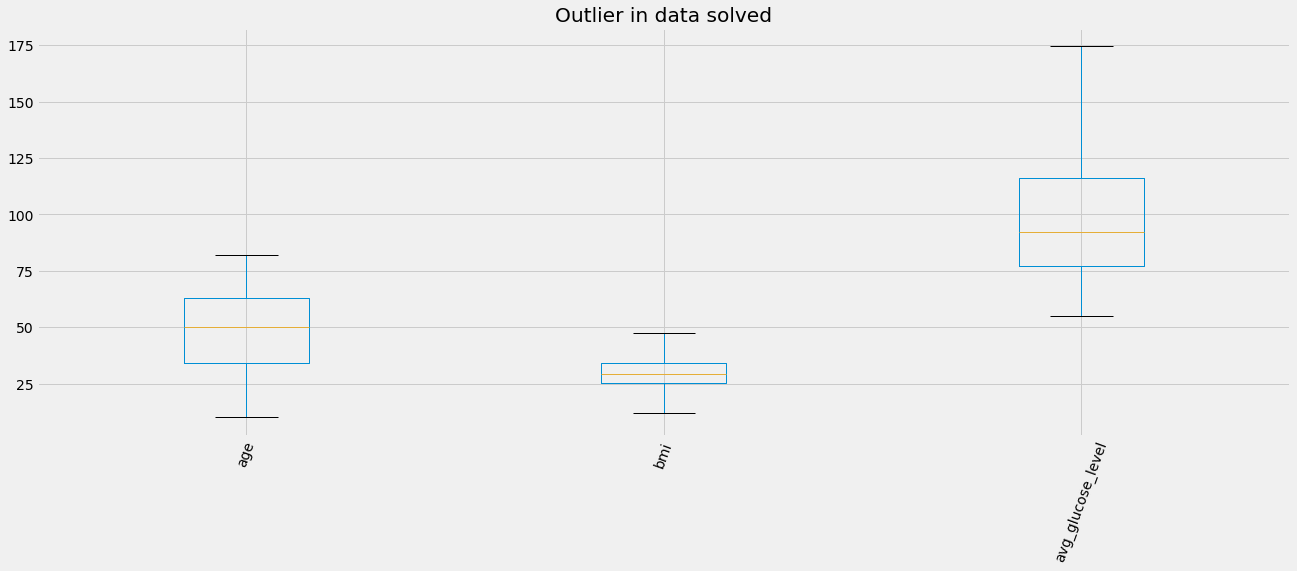

In [26]:
# outliers solved

pltm.style.use('fivethirtyeight')
outlier= df[['age', 'bmi', 'avg_glucose_level']].plot(kind='box',figsize=(20,7));
pltm.xticks(rotation=70);
pltm.title('Outlier in data solved');

### 4.3 Dublicates

In [27]:
# Checking for duplicates

duplicate = df.duplicated()
duplicate.sum()

0

### 4.4 Transferming Data to NumPy arrays

In [28]:
# Transforming selected features to NumPy

X = np.asarray(df[['gender', 'age', 'hypertension', 'heart_disease', 
    'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 
    'bmi', 'smoking_status']])
X[:5]

array([[  1.   ,  67.   ,   0.   ,   1.   ,   1.   ,   2.   ,   1.   ,
        174.655,  36.6  ,   1.   ],
       [  1.   ,  80.   ,   0.   ,   1.   ,   1.   ,   2.   ,   0.   ,
        105.92 ,  32.5  ,   0.   ],
       [  0.   ,  49.   ,   0.   ,   0.   ,   1.   ,   2.   ,   1.   ,
        171.23 ,  34.4  ,   3.   ],
       [  0.   ,  79.   ,   1.   ,   0.   ,   1.   ,   3.   ,   0.   ,
        174.12 ,  24.   ,   0.   ],
       [  1.   ,  81.   ,   0.   ,   0.   ,   1.   ,   2.   ,   1.   ,
        174.655,  29.   ,   1.   ]])

In [29]:
# Transforming target variable to NumPy
y = np.asarray(df['stroke'])
y [0:5]

array([1, 1, 1, 1, 1])

### 4.5 Training data

In [30]:
# Importing Train Test Split

from sklearn.model_selection import train_test_split

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2740, 10) (2740,)
Test set: (685, 10) (685,)


### 4.6 Oversampling

In [31]:
## SMOTE oversampling library.
from imblearn.over_sampling import SMOTE

In [32]:
# Oversampling

SMOTE_oversample = SMOTE(random_state=1)
X_train,y_train = SMOTE_oversample.fit_resample(X_train, y_train.ravel())

In [33]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5186, 10) (5186,)
Test set: (685, 10) (685,)


### 4.7 Standardasing data

In [34]:
# Standardasing data

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.24815024,  0.97348048, -0.36774132,  3.95300058,  0.56375043,
        -0.58239361,  0.98119861,  2.00166411,  0.95965289,  0.09363461],
       [ 1.24815024,  1.6632357 , -0.36774132,  3.95300058,  0.56375043,
        -0.58239361, -1.01916165,  0.08149767,  0.35154448, -0.75477425],
       [-0.8011856 ,  0.01843478, -0.36774132, -0.25297239,  0.56375043,
        -0.58239361,  0.98119861,  1.90598404,  0.63335082,  1.79045234],
       [-0.8011856 ,  1.6101776 ,  2.71930282, -0.25297239,  0.56375043,
         0.6954399 , -1.01916165,  1.98671847, -0.9091681 , -0.75477425],
       [ 1.24815024,  1.71629379, -0.36774132, -0.25297239,  0.56375043,
        -0.58239361,  0.98119861,  2.00166411, -0.16757246,  0.09363461]])

## 5. Model Evaluation

In [35]:
from sklearn.metrics import classification_report
from sklearn import metrics

### 5.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# We defining the model
LR = LogisticRegression(C=10)

# We train the model
LR.fit(X_train, y_train)

# We predict target values
yhat = LR.predict(X_test)

# Predicted values vs Actual values

print(yhat[0:20])
print(y_test[0:20])

[1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       652
           1       0.12      0.76      0.21        33

    accuracy                           0.72       685
   macro avg       0.55      0.74      0.52       685
weighted avg       0.94      0.72      0.80       685



### 5.2 K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
KNN.fit(X_train, y_train)

# We predict target values
yhat1 = KNN.predict(X_test)

# Predicted values vs Actual values

print(yhat1[0:20])
print(y_test[0:20])

[1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
print(metrics.classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       652
           1       0.10      0.48      0.17        33

    accuracy                           0.77       685
   macro avg       0.53      0.63      0.52       685
weighted avg       0.93      0.77      0.83       685



### 5.3 Support Vector Machine (SVM) 

In [40]:
# Importing Libraries

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
SVM = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
SVM.fit(X_train, y_train)

# We predict target values
yhat2 = SVM.predict(X_test)

# Predicted values vs Actual values

print(yhat2[0:20])
print(y_test[0:20])

[1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
print(metrics.classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.99      0.71      0.82       652
           1       0.12      0.82      0.21        33

    accuracy                           0.71       685
   macro avg       0.56      0.76      0.52       685
weighted avg       0.95      0.71      0.79       685



### 5.4 Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
DT = DecisionTreeClassifier(random_state=9)

# We train model
DT.fit(X_train, y_train)

# We predict target values
yhat3 = DT.predict(X_test)

# Predicted values vs Actual values

print(yhat3[0:20])
print(y_test[0:20])

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
print(metrics.classification_report(y_test, yhat3))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       652
           1       0.12      0.24      0.16        33

    accuracy                           0.88       685
   macro avg       0.54      0.58      0.55       685
weighted avg       0.92      0.88      0.90       685



### 5.5 Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

# We define the model
NB = GaussianNB()

# We train model
NB.fit(X_train, y_train)

# We predict target values
yhat4 = NB.predict(X_test)

# Predicted values vs Actual values

print(yhat4[0:20])
print(y_test[0:20])

[1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
print(metrics.classification_report(y_test, yhat4))


              precision    recall  f1-score   support

           0       0.98      0.73      0.84       652
           1       0.12      0.73      0.21        33

    accuracy                           0.73       685
   macro avg       0.55      0.73      0.52       685
weighted avg       0.94      0.73      0.81       685



## 5.6 Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
RF = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
RF.fit(X_train, y_train)

# We predict target values
yhat5 = RF.predict(X_test)

# Predicted values vs Actual values

print(yhat5[0:20])
print(y_test[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
print(metrics.classification_report(y_test, yhat5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       652
           1       0.07      0.03      0.04        33

    accuracy                           0.93       685
   macro avg       0.51      0.51      0.50       685
weighted avg       0.91      0.93      0.92       685



## 6. Model Comparision

### 6.1 Confusion Matrix

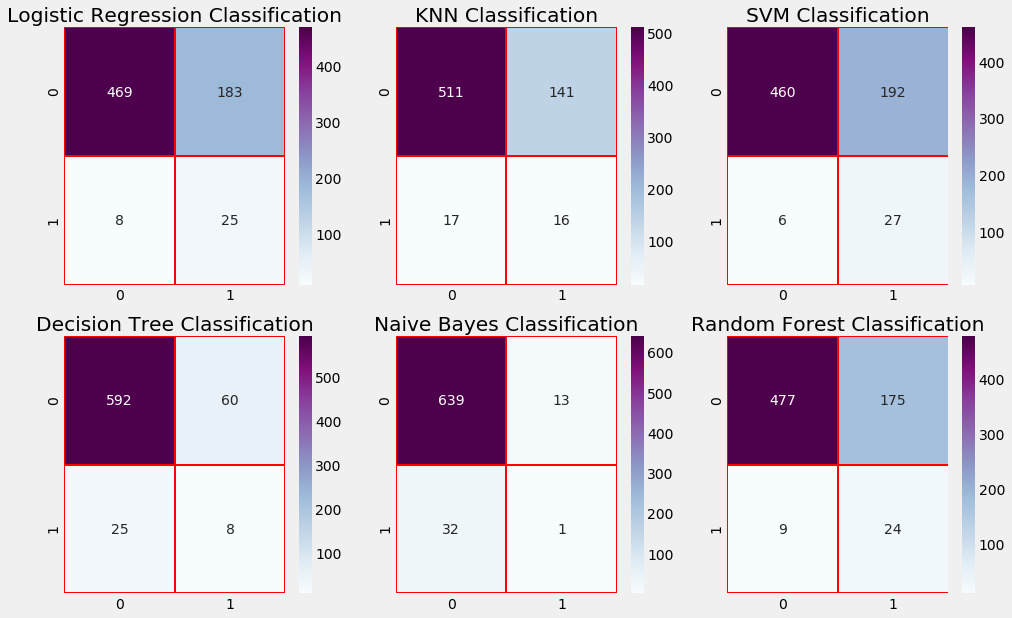

In [48]:
# Confusion matrix by models

#Importing library
from sklearn.metrics import confusion_matrix

#--------------------------------------------------

LR_cm = confusion_matrix(y_test, yhat)
KNN_cm = confusion_matrix(y_test, yhat1)
SVM_cm = confusion_matrix(y_test, yhat2)
DT_cm = confusion_matrix(y_test, yhat3)
NB_cm = confusion_matrix(y_test, yhat4)
RF_cm = confusion_matrix(y_test, yhat5)

#--------------------------------------------------

# PLTM
fig = pltm.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('KNN Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Naive Bayes Classification')
ax6 = fig.add_subplot(3, 3, 6)

ax6.set_title('Random Forest Classification')
#--------------------------------------------------

sb.heatmap(data=LR_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sb.heatmap(data=KNN_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)  
sb.heatmap(data=SVM_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax3)
sb.heatmap(data=DT_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax4)
sb.heatmap(data=RF_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax5)
sb.heatmap(data=NB_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax6)
pltm.show()

- From confusion matrix, SVM Classification defined correct heart stroke 27 cases, however Naive Bayes Classification did 1 only. 
- Decision tree clasification outperformed the rest model in terms of definining non stroke cases.

### 6.2 Model Precision Comparision

In [49]:
# Logistic Regression

#Accuracy score
LR_train_score = LR.score(X_train,y_train)
LR_test_score = LR.score(X_test,y_test)

# f1-score
LR_f1_score = metrics.f1_score(y_test, yhat)
LR_recall = metrics.recall_score(y_test,yhat)

#--------------------------------------------------

# K-Nearest Neigbhor

#Accuracy score
KNN_train_score = KNN.score(X_train,y_train)
KNN_test_score = KNN.score(X_test,y_test)

# f1-score
KNN_f1_score = metrics.f1_score(y_test, yhat1)
KNN_recall = metrics.recall_score(y_test, yhat1)

#--------------------------------------------------

# SVM

#Accuracy score
SVM_train_score = SVM.score(X_train,y_train)
SVM_test_score = SVM.score(X_test,y_test)

# f1-score
SVM_f1_score = metrics.f1_score(y_test,yhat2)
SVM_recall = metrics.recall_score(y_test,yhat2)

#--------------------------------------------------

# Decision Tree

#Accuracy score
DT_train_score = DT.score(X_train,y_train)
DT_test_score = DT.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, yhat3)
DT_recall = metrics.recall_score(y_test, yhat3)

#--------------------------------------------------

#  Naive Bayes

#Accuracy score
NB_train_score = NB.score(X_train,y_train)
NB_test_score = NB.score(X_test,y_test)

# f1-score
NB_f1_score = metrics.f1_score(y_test, yhat4)
NB_recall = metrics.recall_score(y_test, yhat4)

#--------------------------------------------------

#Random Forest

#Accuracy score
RF_train_score = RF.score(X_train,y_train)
RF_test_score = RF.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test, yhat5)
RF_recall = metrics.recall_score(y_test, yhat5)

#--------------------------------------------------

comparing_models = pd.DataFrame({
    
'Models':['Logistic Regression', 'K-Nearest Neigbhor' , 'Support Vector Machine', 
          'Desicion Tree', 'Naive_Bayes', 'Random Forest Classifier'],
'F1_Score':[LR_f1_score, KNN_f1_score, SVM_f1_score, DT_f1_score, NB_f1_score, RF_f1_score],
'Recall':[LR_recall, KNN_recall, SVM_recall, DT_recall, NB_recall, RF_recall],
'Accuracy on Train Set':[LR_train_score, KNN_train_score, SVM_train_score, 
                         DT_train_score, NB_train_score, RF_train_score],
'Accuracy on Test Set':[LR_test_score, KNN_test_score, SVM_test_score, 
                        DT_test_score, NB_test_score, RF_test_score]
                                })

comparing_models = comparing_models.sort_values('Recall',ascending=False)

comparing_models.style.background_gradient(cmap='Greens')

,Models,F1_Score,Recall,Accuracy on Train Set,Accuracy on Test Set
2,Support Vector Machine,0.214286,0.818182,0.759545,0.710949
0,Logistic Regression,0.207469,0.757576,0.755496,0.721168
4,Naive_Bayes,0.206897,0.727273,0.757809,0.731387
1,K-Nearest Neigbhor,0.168421,0.484848,0.912842,0.769343
3,Desicion Tree,0.158416,0.242424,1.000000,0.875912
5,Random Forest Classifier,0.042553,0.030303,1.000000,0.934307


### 6.3 ROC Curve

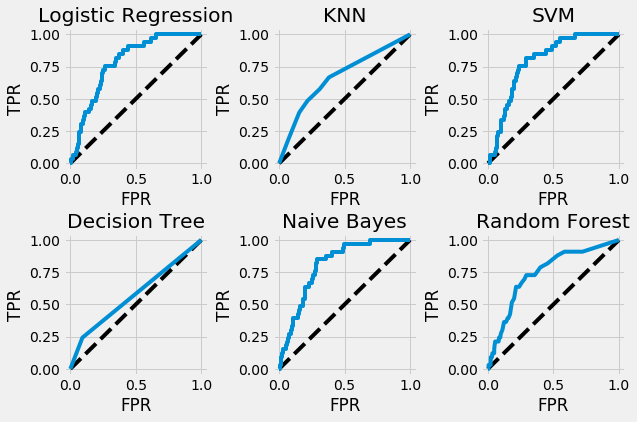

In [50]:
from sklearn.metrics import roc_curve

#--------------------------------------------------

# Logistic Regression Classification
yhat_pr = LR.predict_proba(X_test)
yhat_pr = yhat_pr[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr)
pltm.subplot(331)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('FPR')
pltm.ylabel('TPR')
pltm.title('Logistic Regression')
pltm.grid(True)

#--------------------------------------------------

# KNN Classification
yhat_pr1 = KNN.predict_proba(X_test)
yhat_pr1 = yhat_pr1[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr1)
pltm.subplot(332)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('FPR')
pltm.ylabel('TPR')
pltm.title('KNN')
pltm.grid(True)

#--------------------------------------------------

# SVM Classification
yhat_pr2 = SVM.predict_proba(X_test)
yhat_pr2 = yhat_pr2[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr2)
pltm.subplot(333)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('FPR')
pltm.ylabel('TPR')
pltm.title('SVM')
pltm.grid(True)

#--------------------------------------------------

# Decision Tree Classification
yhat_pr3 = DT.predict_proba(X_test)
yhat_pr3 = yhat_pr3[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr3)
pltm.subplot(334)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('FPR')
pltm.ylabel('TPR')
pltm.title('Decision Tree')
pltm.grid(True)

#--------------------------------------------------

# Naive Bayes Classification
yhat_pr4 = NB.predict_proba(X_test)
yhat_pr4 = yhat_pr4[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr4)
pltm.subplot(335)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('FPR')
pltm.ylabel('TPR')
pltm.title('Naive Bayes')
pltm.grid(True)

#--------------------------------------------------

# Random Forest Classification
yhat_pr5 = RF.predict_proba(X_test)
yhat_pr5 = yhat_pr5[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat_pr5)
pltm.subplot(336)
pltm.plot([0,1],[0,1],'k--')
pltm.plot(fpr,tpr, label='ANN')
pltm.xlabel('FPR')
pltm.ylabel('TPR')
pltm.title('Random Forest')
pltm.grid(True)
pltm.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
pltm.show()

## 7. Conclusion

Model comperasions and model accuracy such as F1-Score, Recall, Confusion Matrix results enable us to say that heart stroke can not be defined based on these model accurately.

Solution for these is that we might need more data - variables such as:
- headaches before
- speech difficulity 
- trouble with walking 
- vision problems
- Sedentary lifestyle
- Family history
- Abnormal heart rhythm.